In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/kaumudiseri/Downloads/Advertising (1).csv', index_col=0)

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
data.shape

(200, 4)

### Features

* TV: Advertising dollars spent on TV for a single product in a given market 
* Radio: Advertising dollars spent on Radio
* Newspaper: Advertising dollars spent on Newspaper

### Response

* Sales: Sales of a single product in a given market (in thousands of items)
* Because the response variable is continuous, this is a Regression problem.
* There are 200 observations (represented by the rows), and each observation is a single market.

In [6]:
import seaborn as sns
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


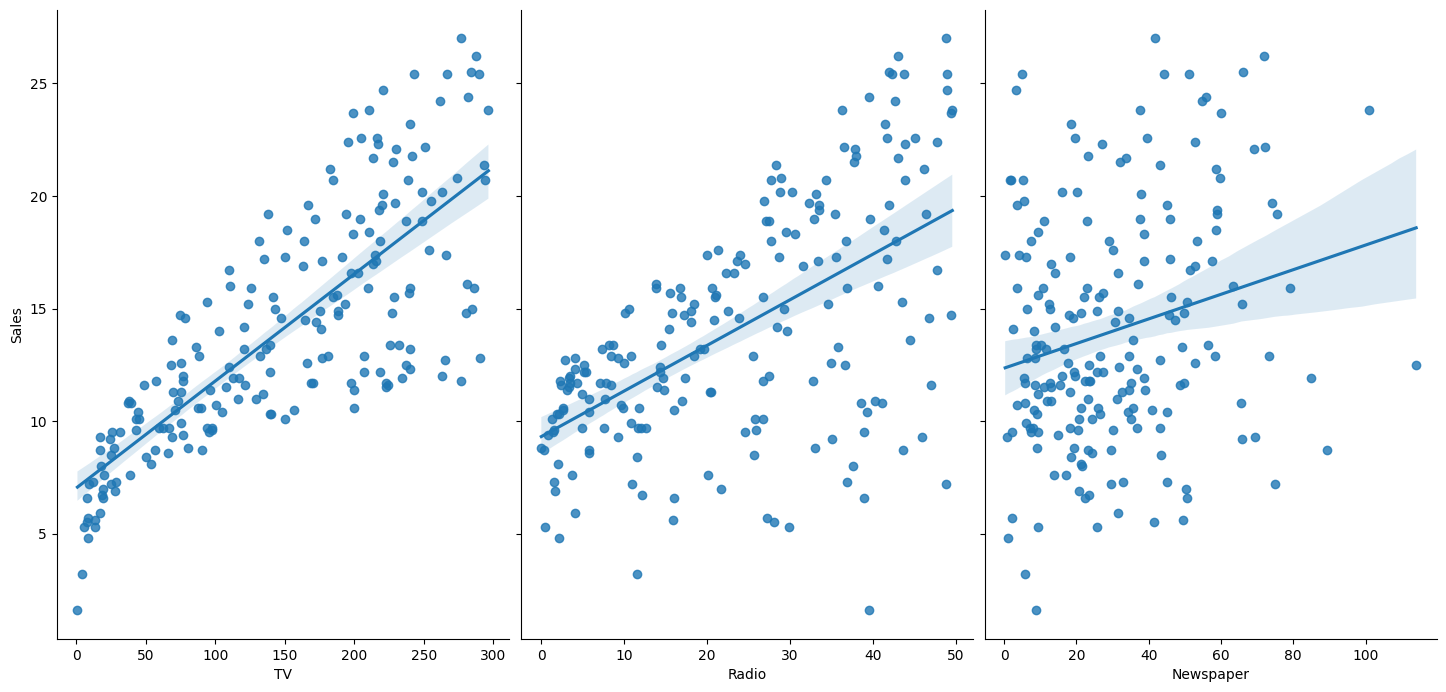

In [7]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

In [8]:
feature_cols = ['TV', 'Radio', 'Newspaper']

X = data[feature_cols]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [9]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [10]:
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [11]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [15]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [16]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


In [17]:
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415026),
 ('Radio', 0.17915812245088852),
 ('Newspaper', 0.0034504647111804326)]

### 𝑦=2.88+0.0466×𝑇𝑉+0.179×𝑅𝑎𝑑𝑖𝑜+0.00345×𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟

### Making predictions:

Model evaluation metrics for regression: 

In [19]:
y_pred = linreg.predict(X_test)

In [20]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

### Calculate Mean Absolute Error (MAE):

### 1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|

In [21]:
print((10 + 0 + 20 + 10)/4.)

from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


### Calculate Mean Squared Error (MSE):

### 1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2

In [22]:
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

print(metrics.mean_squared_error(true, pred))

150.0
150.0


### Calculate Root Mean Squared Error (RMSE):

In [23]:
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


### Computing the RMSE for our Sales predictions:

In [24]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328946


### Feature selection

To check if Newspaper "belong" in our model that is, does it improve the quality of our predictions?
Therefore we remove it from the model and check the RMSE!

In [25]:
feature_cols = ['TV', 'Radio']

X = data[feature_cols]

y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382882


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) 

Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.